DATA PREPROCESSING

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Retail_Transactions_2000.csv')
df.head()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123


In [7]:
df.size

22000

In [8]:
df.shape

(2000, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TransactionID    2000 non-null   object
 1   CustomerID       2000 non-null   object
 2   Gender           2000 non-null   object
 3   Age              2000 non-null   int64 
 4   City             2000 non-null   object
 5   ProductCategory  2000 non-null   object
 6   Quantity         2000 non-null   int64 
 7   Price            2000 non-null   int64 
 8   PurchaseDate     2000 non-null   object
 9   PaymentMode      2000 non-null   object
 10  TotalAmount      2000 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 172.0+ KB


In [15]:
df.describe()

,Age,Quantity,Price,PurchaseDate,TotalAmount,Year,DayOfWeek,Date
count,2000.000000,2000.000000,2000.00000,2000,2000.000000,2000.000000,2000.000000,2000.000000
mean,44.679000,2.957000,2496.61000,2023-07-02 18:48:14.400000,7307.414500,2023.003000,3.000000,15.708000
min,18.000000,1.000000,100.00000,2023-01-01 00:00:00,111.000000,2023.000000,0.000000,1.000000
25%,32.000000,2.000000,1239.00000,2023-04-06 18:00:00,2756.250000,2023.000000,1.000000,8.000000
50%,45.000000,3.000000,2481.50000,2023-07-01 12:00:00,5562.500000,2023.000000,3.000000,16.000000
75%,58.000000,4.000000,3695.50000,2023-09-26 00:00:00,10751.250000,2023.000000,5.000000,23.000000
max,70.000000,5.000000,5000.00000,2024-01-01 00:00:00,24950.000000,2024.000000,6.000000,31.000000
std,15.179795,1.412143,1413.95187,NaN,5705.065758,0.054704,2.032748,8.700493


In [10]:
df.isnull().sum()

TransactionID      0
CustomerID         0
Gender             0
Age                0
City               0
ProductCategory    0
Quantity           0
Price              0
PurchaseDate       0
PaymentMode        0
TotalAmount        0
dtype: int64

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df['Age'] = df['Age'].fillna(np.mean(df['Age']))
df['City'] = df['City'].fillna(df['City'].mode()[0])
df = df.dropna(subset=['TransactionID', 'ProductCategory'])
df = df.drop_duplicates(subset=['TransactionID'], keep='first')

df['Gender'] = df['Gender'].str.lower().map({
    'm': 'Male', 'male': 'Male',
    'f': 'Female', 'female': 'Female'
})
df['Gender'] = df['Gender'].fillna('Others')

df['Quantity'] = df['Quantity'].abs()
df['Price'] = df['Price'].abs()
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])

In [19]:
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])

df['Year'] = df['PurchaseDate'].dt.year           
df['MonthName'] = df['PurchaseDate'].dt.month_name() 
df['DayOfWeek'] = df['PurchaseDate'].dt.dayofweek
df['DayName'] = df['PurchaseDate'].dt.day_name()
df['Date'] = df['PurchaseDate'].dt.day
     
df.head()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,Year,MonthName,DayOfWeek,DayName,Date,AgeGroup
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437,2023,March,2,Wednesday,15,26-40
1,T00002,C1409,Others,20,Pune,Books,5,1051,2023-01-22,Card,5255,2023,January,6,Sunday,22,18-25
2,T00003,C5506,Others,47,Pune,Furniture,1,111,2023-04-18,Wallet,111,2023,April,1,Tuesday,18,41-60
3,T00004,C5012,Others,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730,2023,August,2,Wednesday,9,18-25
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123,2023,September,5,Saturday,23,41-60


In [14]:
bins = [17, 25, 40, 60, 120]
labels = ["18-25", "26-40", "41-60", "60+"]

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [20]:
df.to_csv("Retail_Cleaned.csv", index=False)

DATA VISUALIZATION

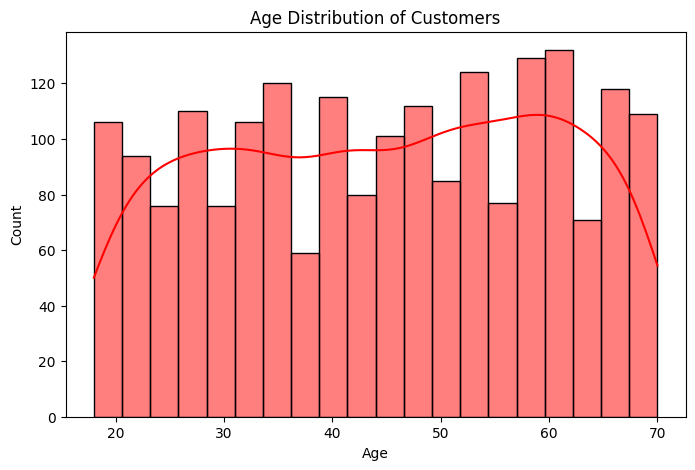

In [28]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True, color="red")
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

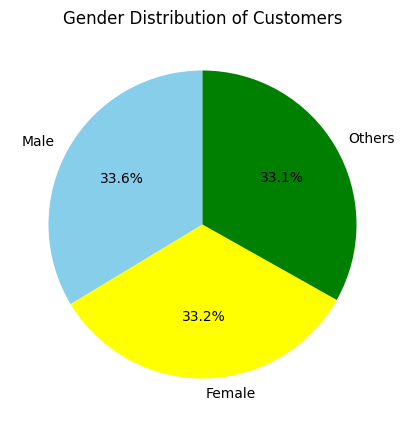

In [27]:
plt.figure(figsize=(6,5))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=["skyblue","yellow","green"])
plt.title("Gender Distribution of Customers")
plt.ylabel("")
plt.show()

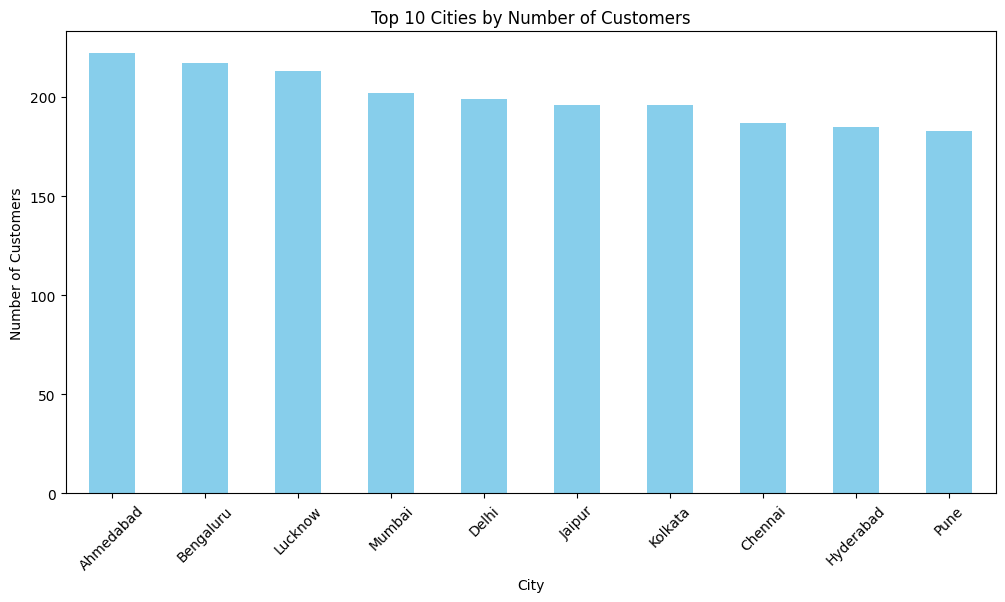

In [26]:
plt.figure(figsize=(12,6))
df['City'].value_counts().head(10).plot(kind='bar', color="skyblue")
plt.title("Top 10 Cities by Number of Customers")
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

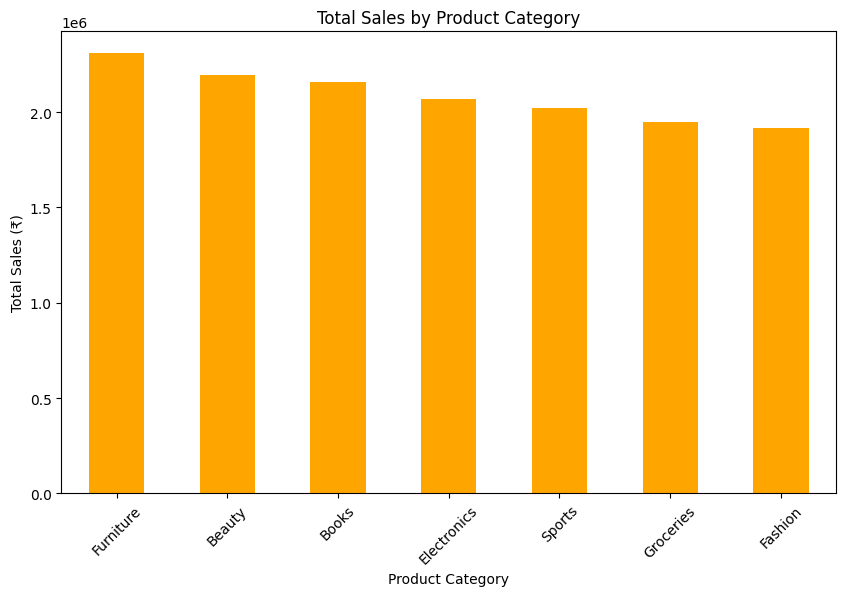

In [29]:
plt.figure(figsize=(10,6))
df.groupby("ProductCategory")["TotalAmount"].sum().sort_values(ascending=False).plot(kind="bar", color="orange")
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales (₹)")
plt.xticks(rotation=45)
plt.show()

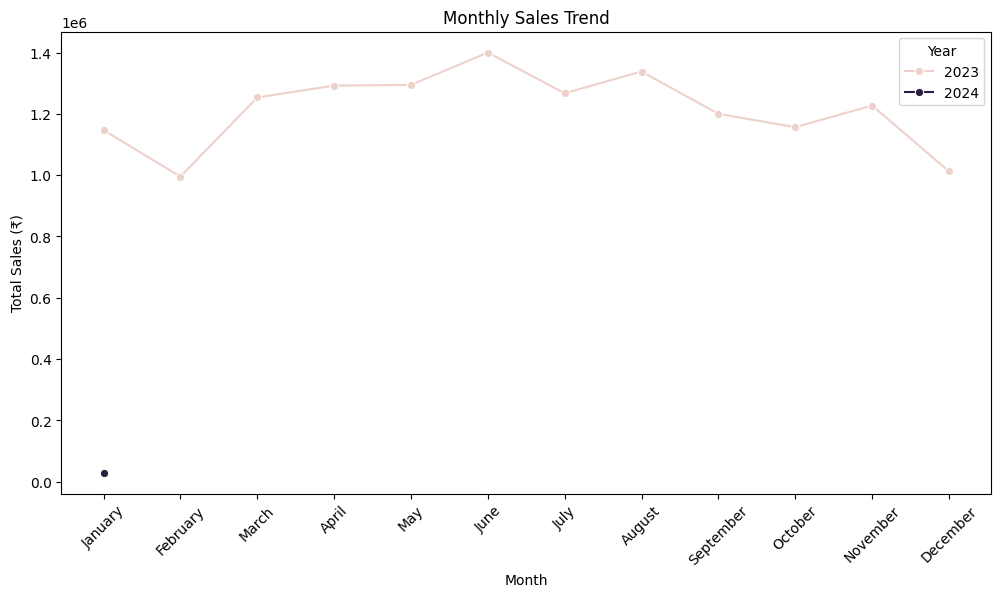

In [30]:
monthly_sales = df.groupby(["Year","MonthName"])["TotalAmount"].sum().reset_index()
month_order = ["January","February","March","April","May","June","July","August","September","October","November","December"]
monthly_sales["MonthName"] = pd.Categorical(monthly_sales["MonthName"], categories=month_order, ordered=True)

monthly_sales = monthly_sales.sort_values(["Year","MonthName"])

plt.figure(figsize=(12,6))
sns.lineplot(x="MonthName", y="TotalAmount", hue="Year", data=monthly_sales, marker="o", color="purple")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (₹)")
plt.xticks(rotation=45)
plt.show()

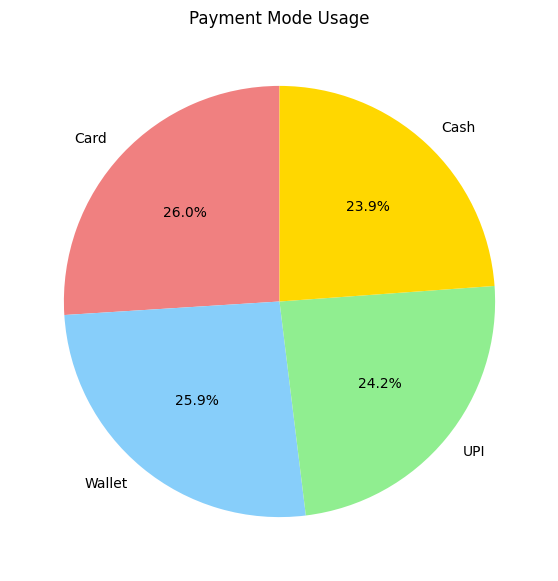

In [31]:
plt.figure(figsize=(7,7))
payment_counts = df['PaymentMode'].value_counts()

plt.pie(payment_counts, 
        labels=payment_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=["lightcoral", "lightskyblue", "lightgreen", "gold"])

plt.title("Payment Mode Usage")
plt.show()

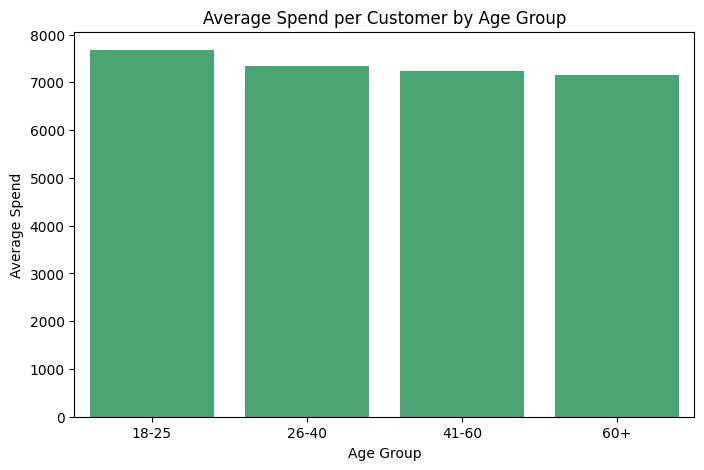

In [36]:
avg_spend = df.groupby("AgeGroup", observed=True)["TotalAmount"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x="AgeGroup", y="TotalAmount", data=avg_spend, color="mediumseagreen")
plt.title("Average Spend per Customer by Age Group")
plt.ylabel("Average Spend")
plt.xlabel("Age Group")
plt.show()


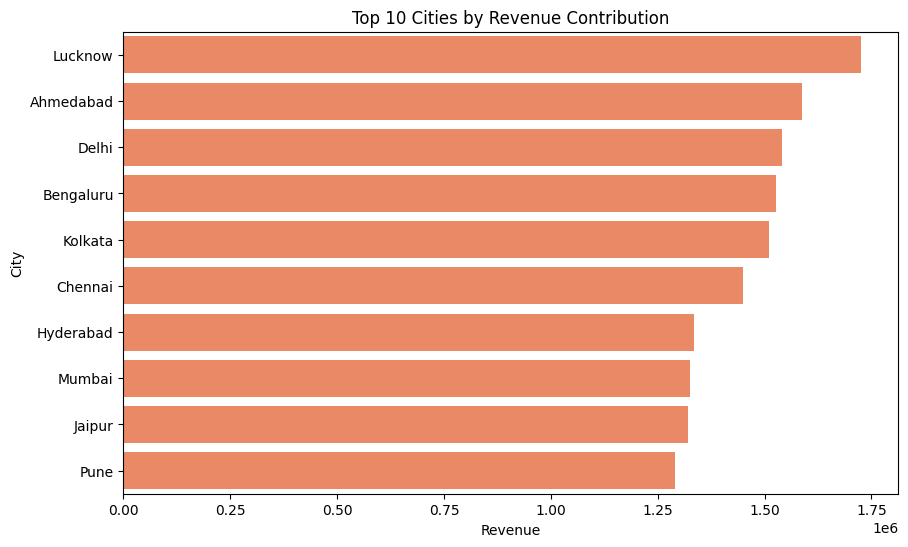

In [37]:
city_revenue = df.groupby("City", observed=True)["TotalAmount"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=city_revenue.values, y=city_revenue.index, color="coral")
plt.title("Top 10 Cities by Revenue Contribution")
plt.xlabel("Revenue")
plt.ylabel("City")
plt.show()


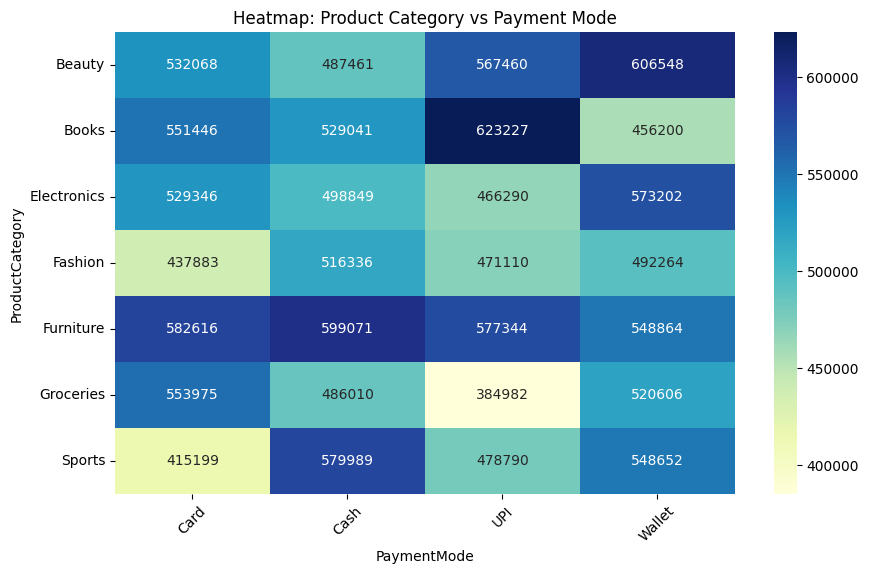

In [38]:
pivot_table = pd.pivot_table(
    df, 
    values="TotalAmount", 
    index="ProductCategory", 
    columns="PaymentMode", 
    aggfunc="sum", 
    fill_value=0,
    observed=True
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Heatmap: Product Category vs Payment Mode")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()
